In [88]:
#imports
import numpy as np
from math import *
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
from matplotlib import gridspec
import warnings
warnings.filterwarnings("ignore")

In [89]:
#Parameter configuration 
c0=334
xmax=10000
nx=10000
dx=xmax/(nx-1)
#x=np.linspace(0,xmax,dx)
isrc=int(nx/2)
ir=isrc+100
nt=600
dt=0.002
#t=np.linspace(0,nt*dt,dt)
eps=c0*dt/dx
print("%f" %(eps))

f0=25
t0=4/f0

0.667933


In [90]:
#Source and time init
src=np.zeros(nt+1)
time=np.linspace(0,nt*dt,nt)
#src=-2 * (time-t0) * f0**2 * np.exp(-f0**2 * (time-t0)**2)
src  = -2. * (time - t0) * (f0 ** 2) * (np.exp(-1.0 * (f0 ** 2) * (time - t0) ** 2))

<IPython.core.display.Javascript object>


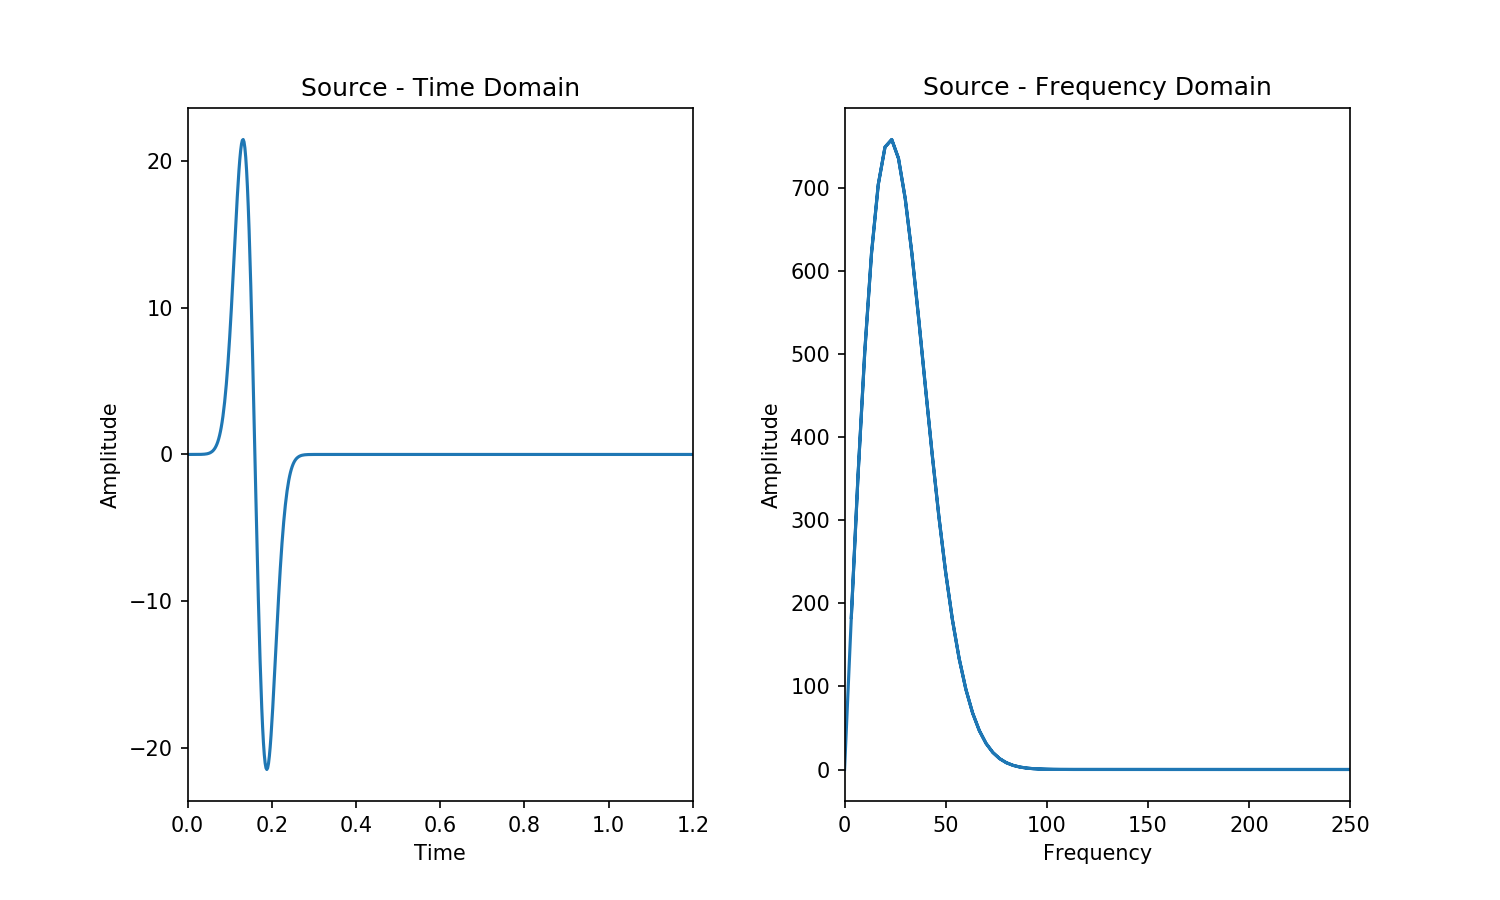

In [91]:
#Plotting the source time function 
plt.ion()
fig1=plt.figure(figsize=(10,6))
grid1=gridspec.GridSpec(1,2,width_ratios=[1,1],wspace=0.3,hspace=0.3)
ax1=plt.subplot(grid1[0])
ax2=plt.subplot(grid1[1])
ax1.plot(time,src)
ax1.set_xlim(0,nt*dt)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.set_title('Source - Time Domain')
srcfft=np.fft.fft(src)
freq=np.fft.fftfreq(srcfft.size,d=dt/4)
ax2.set_xlim(0,250)
ax2.plot(np.abs(freq),np.abs(srcfft))
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Amplitude')
ax2.set_title('Source - Frequency Domain')
plt.show()

<IPython.core.display.Javascript object>


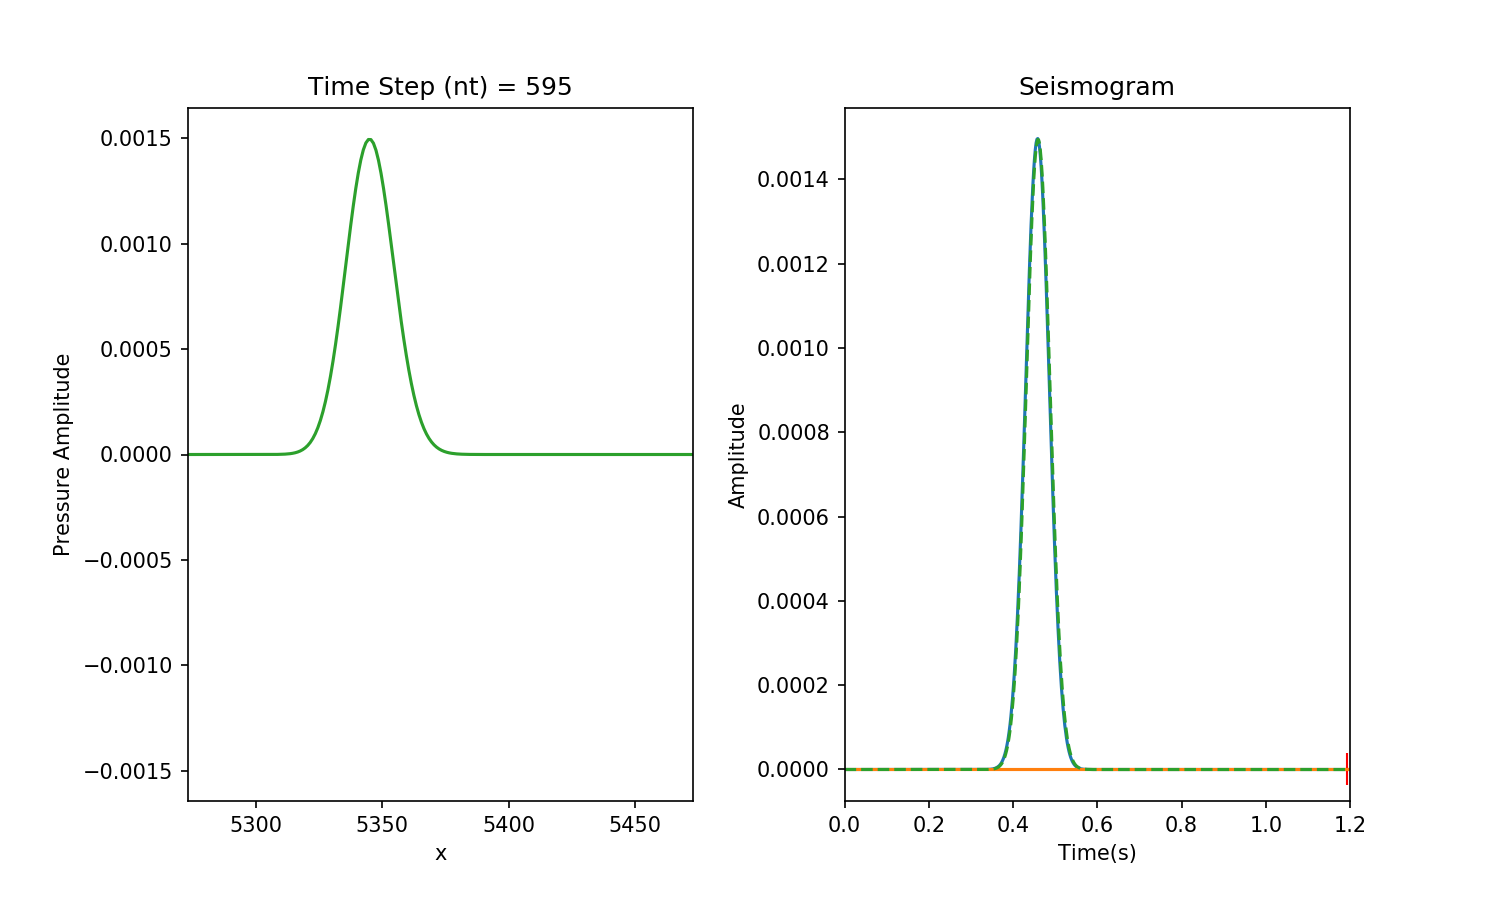

In [96]:
#Pressure initialization
pold=np.zeros(nx)
pnew=np.zeros(nx)
p=np.zeros(nx)
c0=334
c=np.zeros(nx)
c=c+c0
x=np.linspace(0,xmax,nx)
seis=np.zeros(nt)
#Analytical solution
#G is the heavside function
G=np.zeros(nt+1)
for it in range(nt):
    if(time[it] > abs(x[isrc] - x[ir])/c0 ):
        G[it]=1/(2*c0)
Gc=np.convolve(G,src*dt)
Gc=Gc[0:nt]
Gcmax=Gc.max()
#Plotting the source and receiver
plt.ion()
fig2=plt.figure(figsize=(10,6))
grid2=gridspec.GridSpec(1,2,width_ratios=[1,1],wspace=0.3,hspace=0.3)
ax3=plt.subplot(grid2[0])
ax4=plt.subplot(grid2[1])
leg1,=ax3.plot(isrc,0,marker="*")
leg2,=ax3.plot(ir,0,marker="^")
up31,=ax3.plot(x,p)
ax3.set_xlim(0,xmax)
ax3.set_xlabel('x')
ax3.set_ylabel('Pressure Amplitude')
#PLotting Finite difference and analytical solutions
leg3,= ax4.plot(0,0,'r--',markersize=1) # plot analytical solution marker
leg4,= ax4.plot(0,0,'b-',markersize=1) # plot numerical solution marker
up41,= ax4.plot(time, seis) # update recorded seismogram each time step
up42,= ax4.plot([0], [0], 'r|', markersize=15) # update time step
ax4.plot(time,seis)
ax4.set_xlim(0,nt*dt)
#ax4.set_ylim(0,1.1*Gcmax)
ax4.set_title('Seismogram')
ax4.set_xlabel('Time(s)')
ax4.set_ylabel('Amplitude')

plt.plot(time,Gc,'--')

In [97]:
#1D Numerical Propagation
d2px=np.zeros(nx)
op=3
for it in range(nt):
    if op==3:
        for i in range(1,nx-1):
            d2px[i] = ( p[i+1] - 2 * p[i] + p[i-1] ) / dx**2
    pnew = 2*p - pold + (c**2 * d2px) * dt**2 #error in their doc 
    pnew[isrc] = pnew[isrc] + src[it] * dt**2 / dx
    pold = p
    p = pnew
    seis[it]=p[ir]
    idisp = 5
    if (it % idisp == 0):
        ax3.set_title('Time Step (nt) = %d' % it)
        ax3.set_ylim(-1.1*np.max(abs(p)),1.1*np.max(abs(p)))
        up31.set_ydata(p)
        window=100
        xshift=25
        ax3.set_xlim(isrc*dx+c0*it*dt-window*dx-xshift,isrc*dx+c0*it*dt+window*dx-xshift)
        up41.set_ydata(seis)
        up42.set_data(time[it], seis[it])
        plt.gcf().canvas.draw()
    